## 1. Consider two classes described by the covariance matrices below (assume zero mean) 
                                            a.∑=[1 0]      b.∑=[1 0.9]
                                                [0 1]          [0.9 1]

a) For each matrix generate 1000 data samples and plot them on separate figures.

Populating the interactive namespace from numpy and matplotlib


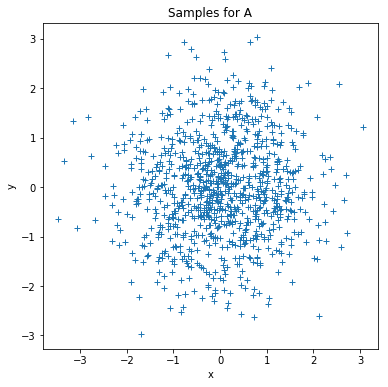

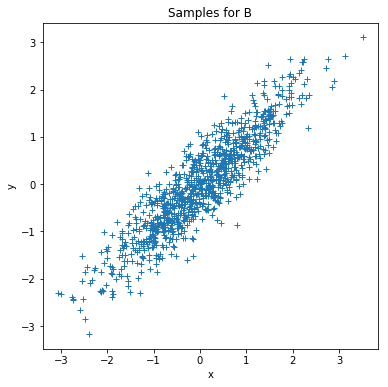

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import patches


a_cov = [[1.0, 0.0], [0.0, 1.0]]
b_cov = [[1.0, 0.9], [0.9, 1.0]]
mean = [0, 0]


# Generation of points for class A and plotting it using Matplotlib
plt.figure(figsize=(6,6))
data_a = np.random.multivariate_normal(mean, a_cov, 1000)
plt.plot(data_a[:,0],data_a[:,1],'+')
plt.title('Samples for A')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Generation of points for class B and plotting it using Matplotlib
plt.figure(figsize=(6,6))
data_b = np.random.multivariate_normal(mean, b_cov, 1000)
plt.plot(data_b[:,0],data_b[:,1],'+')
plt.title('Samples for B')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

b) For each case calculate first standard deviation contour as a function of the mean, eigenvalues, and eigenvectors. Show your calculation (Hint: consider distribution whitening from the tutorial). You may use preexisting functions for Eigen computation.
Plot each contour on the respective plots from part (a).

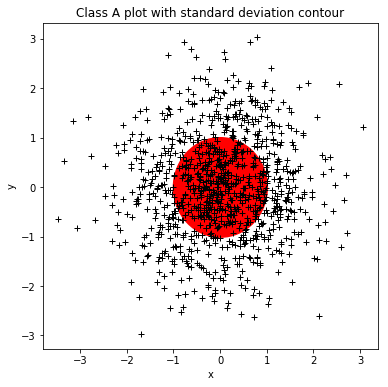

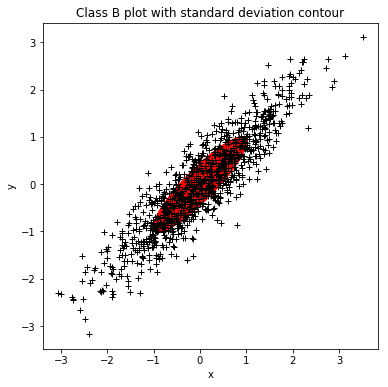

In [3]:
import matplotlib.pyplot as plt
from matplotlib import patches

w_a,v_a=np.linalg.eig(a_cov)
w_b,v_b=np.linalg.eig(b_cov)


# Calucating STD
std_a=np.sqrt(w_a)
std_b=np.sqrt(w_b)

# Calucating angle using eigen vectors for class A
angle=np.degrees(np.arctan((v_a[0,1])/(v_a[1,1])))*(-1)

# Plotting for class B
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(data_a[:,0], data_a[:,1],'k+')
e1 = patches.Ellipse((np.mean(data_a[:,0]), np.mean(data_a[:,1])), 
                     std_a[0]*2, std_a[1]*2,angle=angle, linewidth=2, 
                     fill=True, zorder=2, color='red')
ax.add_patch(e1)
plt.title('Class A plot with standard deviation contour')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calucating angle using eigen vectors for class B
angle=np.degrees(np.arctan((v_b[0,1])/(v_b[1,1])))*(-1)


# Plotting for class B
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(data_b[:,0], data_b[:,1],'k+')
e2 = patches.Ellipse((np.mean(data_b[:,0]), np.mean(data_b[:,1])),
                     std_b[0]*2, std_b[1]*2, angle=angle, linewidth=2, 
                     fill=True, zorder=2, color='red')
ax.add_patch(e2)
plt.title('Class B plot with standard deviation contour')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### c) Calculate sample covariance matrices for each class using the data generated in part(a). Do not use a Python/Matlab function for computing the covariance.

In [10]:
# Calculating covariance of class A
tmp_a = data_a - np.mean(data_a)
sample_cov_a = np.matmul(tmp_a.T, tmp_a) / len(tmp_a)
print("Cov(A):\n",sample_cov_a)

# Calculating covariance of class B
tmp_b= data_b - np.mean(data_b)
sample_cov_b = np.matmul(tmp_b.T, tmp_b) / len(tmp_b)
print("\nCov(B):\n",sample_cov_b)

Cov(A):
 [[1.01610862 0.04286161]
 [0.04286161 1.03927416]]

Cov(B):
 [[1.04891803 0.93509886]
 [0.93509886 1.01803137]]


### d) Compare the given covariance matrix for each class with the corresponding sample covariance matrix generated in (b).

In [12]:
# Calculating RMSE for covariance of A
mse = ((a_cov - sample_cov_a)**2).mean(axis=None)
print("RMSE for Cov A:",mse)

# Calculating RMSE for covariance of B
mse = ((b_cov - sample_cov_b)**2).mean(axis=None)
print("RMSE for Cov B:",mse)

RMSE for Cov A: 0.001369045544623301
RMSE for Cov B: 0.0012954910153811984
